## Day 32 Lecture 2 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split



In [0]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csect = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

Our goal is to predict the patient needed a csection.

In [71]:
csection = csect.copy()
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


Check whether the data has missing values and remove all rows containing missing values.

In [72]:
# answer below:
csection.isnull().sum()*100/csection.isnull().count()


Age                0.0
Delivery number    0.0
Delivery time      0.0
Blood Pressure     0.0
Heart Problem      0.0
Caesarian          0.0
dtype: float64

In [73]:
print(csection['Blood Pressure'].nunique())
print(csection['Delivery number'].nunique())
print(csection['Delivery time'].nunique())
print(csection['Heart Problem'].nunique())
print(csection['Caesarian'].nunique())

3
4
3
2
2


Examine the distribution of delivery number, blood pressure and heart problem.

In [74]:
csection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
Age                80 non-null int64
Delivery number    80 non-null int64
Delivery time      80 non-null int64
Blood Pressure     80 non-null int64
Heart Problem      80 non-null int64
Caesarian          80 non-null int64
dtypes: int64(6)
memory usage: 3.9 KB


In [75]:
# answer below:
print(stats.shapiro(csection['Age']))
print(stats.shapiro(csection['Delivery number']))
print(stats.shapiro(csection['Delivery time']))
print(stats.shapiro(csection['Blood Pressure']))
print(stats.shapiro(csection['Heart Problem']))
print(stats.shapiro(csection['Caesarian']))


(0.985468327999115, 0.5022286772727966)
(0.7658017873764038, 5.813566850143559e-10)
(0.708907961845398, 2.658044964687356e-11)
(0.8076173663139343, 7.82169262691923e-09)
(0.6133193969726562, 3.385373578690398e-13)
(0.628216028213501, 6.333036851012552e-13)


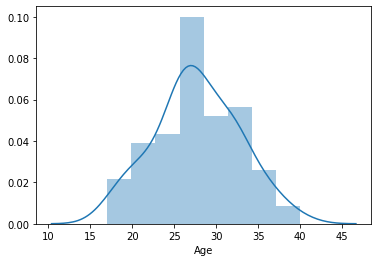

In [76]:
ax = sns.distplot(csection['Age'])

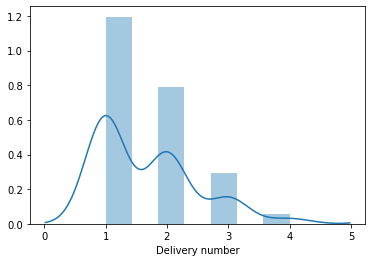

In [77]:
ax = sns.distplot(csection['Delivery number'])

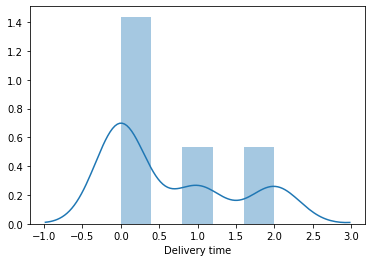

In [78]:
ax = sns.distplot(csection['Delivery time'])

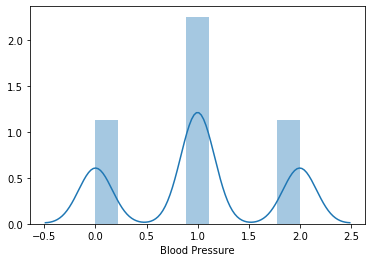

In [79]:
ax = sns.distplot(csection['Blood Pressure'])

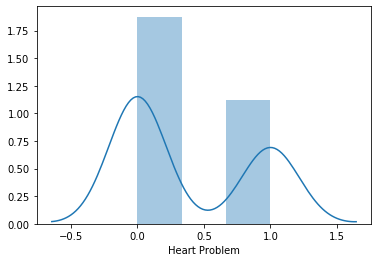

In [80]:
ax = sns.distplot(csection['Heart Problem'])

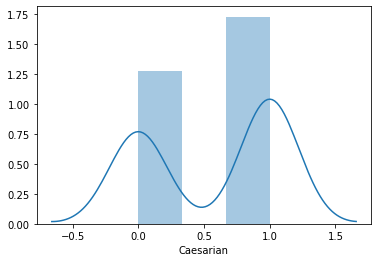

In [81]:
ax = sns.distplot(csection['Caesarian'])

What are your conclusions from the distributions of these variables? Write them below.

They are not normally distributed from looking at the Shapiro tests and histogram plots.

In [82]:
# answer below:
print(csection['Blood Pressure'].unique())
print(csection['Delivery number'].unique())
print(csection['Delivery time'].unique())



[2 1 0]
[1 2 3 4]
[0 1 2]


Create dummy variables from all columns containing categorical variables with more than two values.

In [83]:
# answer below:

csection['Blood Pressure'] = csection['Blood Pressure'].astype('object')
csection['Delivery number'] = csection['Delivery number'].astype('object')
csection['Delivery time'] = csection['Delivery time'].astype('object')

csection = pd.concat([csection,pd.get_dummies(csection['Blood Pressure'], prefix="bp", drop_first=True)], axis=1)
csection = pd.concat([csection,pd.get_dummies(csection['Delivery number'], prefix="dn", drop_first=True)], axis=1)
csection = pd.concat([csection,pd.get_dummies(csection['Delivery time'], prefix="dt", drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(csection['Blood Pressure'], prefix="bp", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(csection['Delivery number'], prefix="dn", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(csection['Delivery time'], prefix="dt", drop_first=True).columns)

csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian,bp_1,bp_2,dn_2,dn_3,dn_4,dt_1,dt_2
0,22,1,0,2,0,0,0,1,0,0,0,0,0
1,26,2,0,1,0,1,1,0,1,0,0,0,0
2,26,2,1,1,0,0,1,0,1,0,0,1,0
3,28,1,0,2,0,0,0,1,0,0,0,0,0
4,22,2,0,1,0,1,1,0,1,0,0,0,0


Split the data into test and train with test containing 20% of the data.

In [0]:
# answer below:

X = csection[['Age'] + dummy_column_names]

y = csection['Caesarian']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)


Use the linear kernel to train a SVC model on our training data. Report the score for the test data.

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

lin_svm= SVC(kernel='linear')
tuned_parameters = [{'C': [.000001, .00001, .0001, .001, .01, .1, .5, 1, 5, 10, 100]}]
lin_svm = GridSearchCV(lin_svm,  param_grid=tuned_parameters, cv=10)
lin_svm.fit(X_train, y_train)
print(lin_svm.best_params_)

{'C': 0.5}


In [89]:
from sklearn.svm import SVC

lin_svm = SVC(C=0.5, kernel='linear', probability=True)

lin_svm.fit(X_train, y_train)


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
from sklearn.metrics import accuracy_score

svm.predict(X_train)

y_train_pred = svm.predict(X_train)

y_test_pred = svm.predict(X_test)

print(accuracy_score(y_train, y_train_pred))

print(accuracy_score(y_test, y_test_pred))

0.6875
0.6875
